# MATH 4340 / COSC 4340: Numerical Methods for Differential Equations
# Notebook 8: Finite Difference Method for BVPs

### Professor: Dane Taylor
### Date: Spring 2024


In [1]:
%pylab inline
from scipy.optimize import fixed_point as fp
from scipy import optimize

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 1. Example 1: Finite Difference Method for Linear BVP


In [52]:
# c2 = 1-c1
# c1   = ( 3 - e^(-2t) ) /  ( e^(2t) - e^(-2t) ) 

c1 = ( 3 - exp(-2) ) /  ( exp(2) - exp(-2) ) 
c2 = 1-c1

true_soln = lambda t: c1*exp(2*t) + c2*exp(-2*t)

t0,T,N = 0,1,3

yi =zeros(N+1)
yi[0] = 1
yi[-1] = 3

ti = linspace(t0,T,N+1)
h = ti[1]-ti[0]
ti

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [53]:
c = -2-4*h**2
M = array([[c,1],[1,c]])
print(M)

b = array([-1,-3])
print(b)

[[-2.44444444  1.        ]
 [ 1.         -2.44444444]]
[-1 -3]


In [54]:
yi[1:3] = linalg.solve(M,b)
yi

array([1.        , 1.0942928 , 1.67493797, 3.        ])

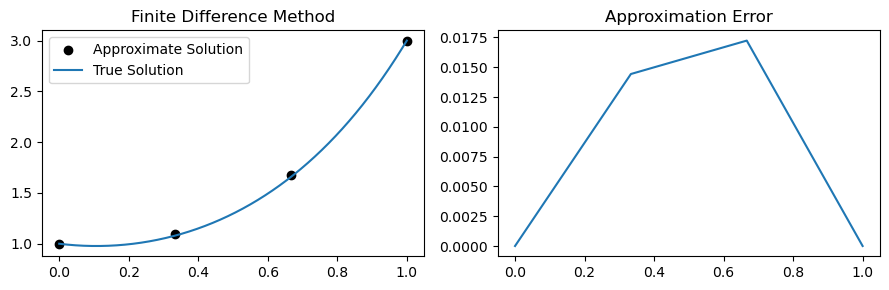

In [55]:
def shoot_fig(ti,yi):

    fig1, ax = subplots(1,2, figsize=(9,3))

    tt = linspace(t0,T,10000)

    ax[0].scatter(ti,yi,c='k')
    ax[0].plot(tt,true_soln(tt))
    ax[0].legend(['Approximate Solution','True Solution'])
    ax[0].set_title('Finite Difference Method')

    ax[1].plot(ti,abs(true_soln(ti) - yi))
    ax[1].set_title('Approximation Error')
    plt.tight_layout()
    
    return fig1,ax

fig1,ax = shoot_fig(ti,yi)

## 2. Example 2: Finite Difference Method for Nonlinear BVP

In [56]:
t0,T,N = 0,pi,5

yi = 0.5*ones(N+1)
yi[0] = 0
yi[-1] = 1

ti = linspace(t0,T,N+1)
h = ti[1]-ti[0]
#ti

In [57]:
def c(i,y):# f1, f2, f3, ...
    if i==0:
        value = (2-h)*y[i+1] - 4*y[i] +  (2+h)*(0) - 2*h**2*cos(y[i])
    elif i==N-2:
        value = (2-h)*(1) - 4*y[i] + (2+h)*y[i-1] - 2*h**2*cos(y[i])
    else:
        value = (2-h)*y[i+1] - 4*y[i] + (2+h)*y[i-1] - 2*h**2*cos(y[i])
        
    return value

In [58]:
def F(y):
    return array([c(i,y) for i in range(len(y))])

In [59]:
sol = optimize.root(F, yi[1:-1],  method='hybr')
yi[1:N] =  sol.x
#yi

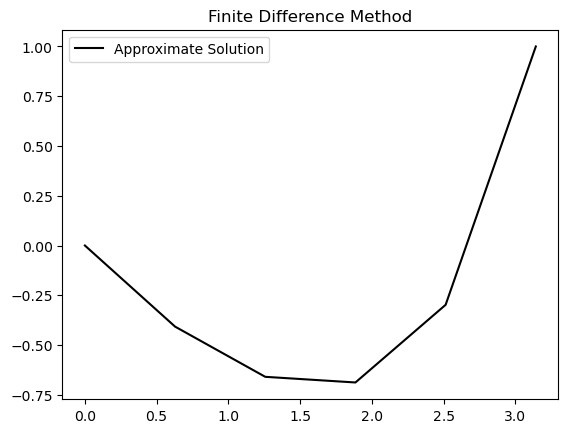

In [60]:
plot(ti,yi,c='k')
legend(['Approximate Solution','True Solution'])
title('Finite Difference Method');

In [61]:
def DF(y): # Jacobian matrix for F
    c1 = 2+h
    c2 = 2-h
    c3 = -4 + 2*h**2*sin(y)

    return diag(c1*ones(len(y)-1),-1) + diag(c2*ones(len(y)-1),1) + diag(c3)

In [62]:
yy = 0.5*ones(N-1)
DF(yy)

array([[-3.62146077,  1.37168147,  0.        ,  0.        ],
       [ 2.62831853, -3.62146077,  1.37168147,  0.        ],
       [ 0.        ,  2.62831853, -3.62146077,  1.37168147],
       [ 0.        ,  0.        ,  2.62831853, -3.62146077]])

In [63]:
def newton_step(y):
    return y - inv(DF(y)) @ F(y)

In [64]:
#Implement Newtons method iterations
yy = 0.5*ones(N-1)
change = 1
tol = 10**(-15)
while change>tol:
    print(yy)
    
    y_temp = newton_step(yy)
    change = norm(y_temp-yy)
    yy =y_temp

[0.5 0.5 0.5 0.5]
[-0.81381912 -1.50547559 -1.77217811 -1.15101292]
[-0.4344863  -0.71300031 -0.75390341 -0.37312181]
[-0.40770837 -0.66030398 -0.68906751 -0.29899585]
[-0.40744412 -0.65966104 -0.68808553 -0.29790442]
[-0.40744407 -0.65966092 -0.68808532 -0.29790419]
[-0.40744407 -0.65966092 -0.68808532 -0.29790419]


In [65]:
F(yy)

array([ 0.00000000e+00, -1.11022302e-16, -1.11022302e-16, -1.11022302e-16])

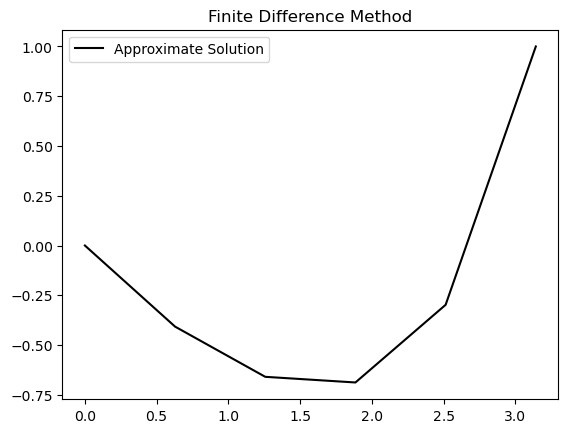

In [66]:
yi[1:N] =  yy
plot(ti,yi,c='k')
legend(['Approximate Solution','True Solution'])
title('Finite Difference Method');

In [67]:
t0,T,N = 0,pi,50

yi = 0.5*ones(N+1)
yi[0] = 0
yi[-1] = 1

ti = linspace(t0,T,N+1)
h = ti[1]-ti[0]

In [70]:
#Implement Newtons method iterations
yy = 0.5*ones(N-1)
change = 1
tol = 10**(-15)
while change>tol:
    #print(yy)
    
    y_temp = newton_step(yy)
    change = norm(y_temp-yy)
    yy =y_temp

In [71]:
F(yy)

array([ 8.67361738e-18, -5.20417043e-18, -2.94902991e-17,  2.60208521e-18,
        7.19910243e-17, -1.21430643e-16,  8.41340886e-17,  6.41847686e-17,
       -1.64798730e-16,  8.50014503e-17, -2.60208521e-18,  5.29090660e-17,
       -1.10154941e-16,  5.03069808e-17, -1.69135539e-16,  1.21430643e-17,
        6.67868538e-17,  1.47451495e-17, -9.02056208e-17,  1.91686944e-16,
       -2.74086309e-16,  2.08166817e-16, -1.01481323e-16,  2.08166817e-17,
        1.75207071e-16, -3.03576608e-16,  2.42861287e-16, -1.39645240e-16,
       -3.90312782e-17,  9.88792381e-17,  2.60208521e-18,  2.25514052e-17,
       -3.46944695e-18,  1.19695920e-16, -2.31585584e-16,  1.43982049e-16,
       -1.49186219e-16,  2.05564732e-16, -3.12250226e-17,  4.51028104e-17,
        4.94396191e-17, -4.33680869e-17,  5.20417043e-18,  6.41847686e-17,
       -7.28583860e-17,  9.36750677e-17, -1.82145965e-17, -1.17961196e-16,
        1.48318857e-16])

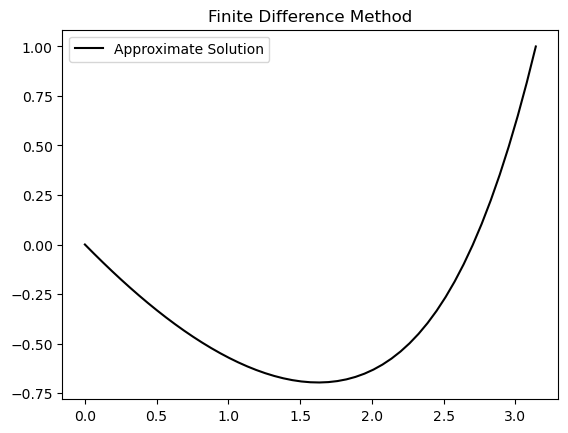

In [72]:
yi[1:N] =  yy
plot(ti,yi,c='k')
legend(['Approximate Solution','True Solution'])
title('Finite Difference Method');